In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer)

In [ ]:
#Splitting data into a and b datasets
a=breast_cancer.data
b=breast_cancer.target
print(a.shape)
print(b.shape)

In [15]:
#Splitting data into train and test datasets
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=88)
print("Training dataset: ", a_train.shape,b_train.shape)
print("Testing dataset: ", a_test.shape,b_test.shape)

Training dataset:  (455, 30) (455,)
Testing dataset:  (114, 30) (114,)


In [22]:
# Build Linear Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [29]:
# Training the lr model with training data
lr.fit(a_train,b_train)

LogisticRegression(max_iter=10000)

In [30]:
# Predict values using testing data
b_pred = lr.predict(a_test)
print(b_pred.shape)
print(b_test.shape)

(114,)
(114,)


In [28]:
# Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(b_pred, b_test))
print("Model precision score: ", precision_score(b_pred, b_test))
print("Model recall score: ", recall_score(b_pred, b_test))
print("Model f1_score: ", f1_score(b_pred, b_test))
print("roc_auc_score: ", roc_auc_score(b_pred, b_test))
print("Confusion matrix: ", confusion_matrix(b_pred, b_test))

Model accuracy score:  0.956140350877193
Model precision score:  0.96
Model recall score:  0.972972972972973
Model f1_score:  0.9664429530201343
roc_auc_score:  0.9489864864864865
Confusion matrix:  [[37  3]
 [ 2 72]]


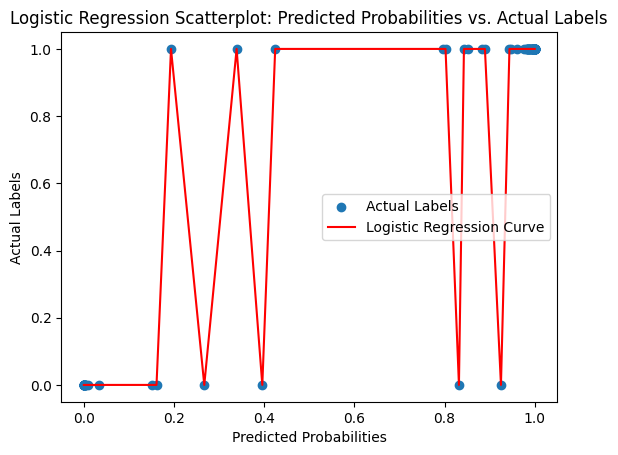

In [27]:
#Scatterplot between predicted values vs. Actual values
b_pred_proba = lr.predict_proba(a_test)[:, 1]  # Predicted probabilities for class 1 (positive class)

# Sort the predicted probabilities and actual labels based on predicted probabilities
sorted_indices = np.argsort(b_pred_proba)
b_pred_proba_sorted = b_pred_proba[sorted_indices]
b_test_sorted = b_test[sorted_indices]

# Plot scatterplot
plt.scatter(b_pred_proba, b_test, label='Actual Labels')
plt.xlabel("Predicted Probabilities")
plt.ylabel("Actual Labels")
plt.title("Logistic Regression Scatterplot: Predicted Probabilities vs. Actual Labels")

# Plot logistic regression curve
plt.plot(b_pred_proba_sorted, b_test_sorted, color='red', label='Logistic Regression Curve')
plt.legend()
plt.show()